<a href="https://colab.research.google.com/github/snjauregui/kaggle-courses/blob/main/TP1_Properati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Library Imports

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
import plotly.express as px
import geopandas as gpd


print("Setup Complete")



Setup Complete


## Load data

In [264]:
properatti_data_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/properatti.csv'
properatti_data = pd.read_csv(properatti_data_filepath)

#properatti_data = pd.read_csv('')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


properatti_data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...


In [265]:
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

In [266]:
properatti_data.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

# Checks

##  Column values

In [267]:
operation = properatti_data['operation'].unique()
print(operation)

['sell']


In [268]:
property_type = properatti_data['property_type'].unique()
print(property_type)

['PH' 'apartment' 'house' 'store']


In [269]:
country_name = properatti_data['country_name'].unique()
print(country_name)

['Argentina']


In [270]:
state_name = properatti_data['state_name'].unique()
print(state_name)

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']


In [271]:
currency = properatti_data['currency'].unique()
print(currency)

['USD' nan 'ARS' 'PEN' 'UYU']


## null Check

In [272]:
percent_missing = properatti_data.isnull().sum() * 100 / len(properatti_data)
missing_value_df = pd.DataFrame({'column_name': properatti_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
operation,operation,0.000000
property_type,property_type,0.000000
place_name,place_name,0.018974
place_with_parent_names,place_with_parent_names,0.000000
country_name,country_name,0.000000
state_name,state_name,0.000000
geonames_id,geonames_id,15.440521
lat-lon,lat-lon,42.525986
lat,lat,42.525986


### Chequeamos los registros que son nulos en price_aprox_usd

Text(0, 0.5, '% de propiedades')

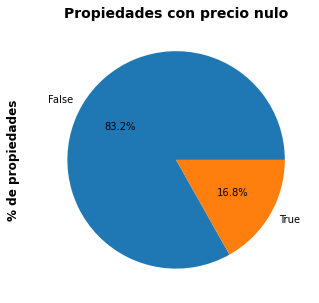

In [273]:
properatti_data_check_null = properatti_data
properatti_data_check_null['flg_null_price'] = properatti_data.price_aprox_usd.isnull()


properatti_data_check_null = properatti_data_check_null.groupby('flg_null_price')['title'].count()

plt = properatti_data_check_null.plot.pie(y="flg_null_price", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades con precio nulo", weight='bold', size=14)
plt.set_ylabel("% de propiedades", labelpad=20, weight='bold', size=12)

### Chequeamos los registros que son nulos superficie

In [274]:
properatti_data_nulls_sup = properatti_data[properatti_data.surface_total_in_m2.isnull()]
properatti_data_nulls_sup.head(5)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,flg_null_price
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0...,False
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...,False
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_rosario_patio_administraci...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLO...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98wKqeDU5Sd7ThE=/trim/198x0...,False
11,11,sell,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.539057,-58.719609,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_san-miguel_jardin_lavadero...,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHRjDwCvDGa9d3vI=/trim/198x0...,False
65,65,sell,store,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General San Martín|San Martín|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5308356,-58.5669559",-34.530836,-58.566956,50000.0,USD,882225.00,50000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bwq_venta_local_san-martin_terraza_spolit...,CODIGO: 1092-VENTA 6886 ubicado en: COMBET 6886 - Publicado por: SPOLI...,LOCAL COMERCIAL CON BAÑO,https://thumbs4.properati.com/4/Zf5sbGX4zlpOTBDOwLEk2BP72Gs=/trim/198x0...,False


Text(0, 0.5, '% de propiedades')

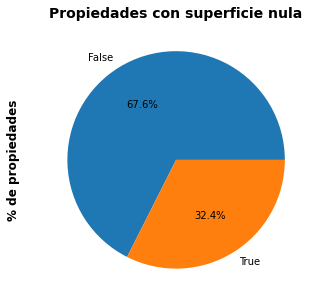

In [275]:
properatti_data_check_null = properatti_data
properatti_data_check_null['flg_null_sup'] = properatti_data.surface_total_in_m2.isnull()


properatti_data_check_null = properatti_data_check_null.groupby('flg_null_sup')['title'].count()

plt = properatti_data_check_null.plot.pie(y="flg_null_sup", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades con superficie nula", weight='bold', size=14)
plt.set_ylabel("% de propiedades", labelpad=20, weight='bold', size=12)

In [276]:
percent_missing = properatti_data_nulls_sup.isnull().sum() * 100 / len(properatti_data_nulls_sup)
missing_value_df = pd.DataFrame({'column_name': properatti_data_nulls_sup.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
operation,operation,0.000000
property_type,property_type,0.000000
place_name,place_name,0.012714
place_with_parent_names,place_with_parent_names,0.000000
country_name,country_name,0.000000
state_name,state_name,0.000000
geonames_id,geonames_id,13.982404
lat-lon,lat-lon,41.593775
lat,lat,41.593775


Podemos ver que los registros con superficie en nulo tienen completos los campos de tipo de propiedad y ubicación. Podemos ver de hacer alguna imputación para no perder esa información.

## Cantidad de ambientes

In [277]:
properatti_data_amb = properatti_data[properatti_data.title.str.contains("amb", case=False)]
properatti_data_amb.head()


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,flg_null_price,flg_null_sup
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...,False,False
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...,False,False
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...,False,True
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...,False,False
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_departamentos_belgrano_lavadero...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO CO...,"JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA",https://thumbs4.properati.com/1/IHxARynlr8sPEWmzhxVZ2cfRb6M=/trim/198x0...,False,False


In [278]:
properatti_data_regex = properatti_data
properatti_data_regex['ambientes'] = properatti_data.description.str.extract('([0-9]*) amb')

In [279]:
properatti_data_regex[properatti_data_regex['ambientes'].notnull()]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,flg_null_price,flg_null_sup,ambientes
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...,False,True,3
11,11,sell,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.539057,-58.719609,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_san-miguel_jardin_lavadero...,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHRjDwCvDGa9d3vI=/trim/198x0...,False,True,1
13,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,1.0,NaN,http://www.properati.com.ar/15bp9_venta_departamentos_palermo-soho_gimn...,Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitrau...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcUeEoqM-LnrvhUk=/trim/198x0...,False,False,3
16,16,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,4.0,NaN,http://www.properati.com.ar/15bpj_venta_ph_mataderos_suite_parrilla_toi...,Ventas Mataderos al frente Duplex 4 amb.- Planta Baja: Entrada de auto-...,VENTA-MATADEROS-DUPLEX 4 AMB.,https://thumbs4.properati.com/7/XSdJtiE8ZkWgonH-7f05Mzz4XM4=/trim/198x0...,False,False,4
17,17,sell,apartment,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio El Golf|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,USD,5558017.50,315000.00,176.0,78.0,1789.772727,4038.461538,NaN,3.0,NaN,http://www.properati.com.ar/15bpl_venta_departamentos_nordelta_balcon_s...,Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn ...,3 ambientes en venta en Acqua Golf 1 en Nordelta con espectacular vista...,https://thumbs4.properati.com/8/txJsOWitsI5tjM-QVxuoamv9pxE=/trim/198x0...,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121204,121204,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj73_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,NaN,False,False,
121205,121205,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj74_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,NaN,False,False,
121206,121206,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj75_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo

## Duplicados

In [280]:
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail',
 'flg_null_price',
 'flg_null_sup',
 'ambientes']

In [281]:
properatti_data.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
flg_null_price                121220
f

In [282]:
properatti_data_wo_duplicates = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [283]:
properatti_data_wo_duplicates.count()

Unnamed: 0                    104056
operation                     104056
property_type                 104056
place_name                    104033
place_with_parent_names       104056
country_name                  104056
state_name                    104056
geonames_id                    87392
lat-lon                        61890
lat                            61890
lon                            61890
price                          88154
currency                       88154
price_aprox_local_currency     88154
price_aprox_usd                88154
surface_total_in_m2            68544
surface_covered_in_m2          86665
price_usd_per_m2               58924
price_per_m2                   76260
floor                           6054
rooms                          41619
expenses                       13193
properati_url                 104056
description                   104055
title                         104056
image_thumbnail               101901
flg_null_price                104056
f

Revisar si hay filas duplicadas

Ver de sumar algo geo 

Ver si podemos aprovechar algo de la descripción

hay 20k propiedades sin precio en dolares, pero esas tampoco tienen precio en ARS. Si filtramos a todas las propiedades sin precio podemos usar la columna que viene del dataset

Los nulos en el campo de currency son en los registros que no tienen precio.
¿Tiene sentido que nos quedemos con estos registros si vamos a usar el dataset para predecir precios de nuevas publicaciones?

nulls Check


Geo? 

Consideramos lat y lon, place_name, o ambos?

¿Normalizamos las monedas a una sola? Habría que flagear esos registros


# Limpieza

## Borro las columnas que no usamos

In [284]:
properatti_data = properatti_data[['operation',
 'property_type',
 'place_name',
 'country_name',
 'lat',
 'lon',
 'price',
 'currency',
 'state_name',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',]]

properatti_data.head()

,operation,property_type,place_name,country_name,lat,lon,price,currency,state_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,-34.661824,-58.508839,62000.0,USD,Capital Federal,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,-34.903883,-57.964330,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,-34.652262,-58.522982,72000.0,USD,Capital Federal,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,-34.647797,-58.516424,95000.0,USD,Capital Federal,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,-38.002626,-57.549447,64000.0,USD,Buenos Aires Costa Atlántica,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


## Borro las registros que no tienen dato de precio

Cuando no tienen currency tampoco tienen los otros campos de price, es lo mismo cual elegís para limpiar

In [285]:
properatti_data = properatti_data[properatti_data['currency'].notnull()]
properatti_data.head(5)

,operation,property_type,place_name,country_name,lat,lon,price,currency,state_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,-34.661824,-58.508839,62000.0,USD,Capital Federal,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,-34.903883,-57.964330,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,-34.652262,-58.522982,72000.0,USD,Capital Federal,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,-34.647797,-58.516424,95000.0,USD,Capital Federal,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,-38.002626,-57.549447,64000.0,USD,Buenos Aires Costa Atlántica,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


In [286]:
properatti_data.price_aprox_usd.count()

100809

In [287]:
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [288]:
properatti_data.count()

operation              88392
property_type          88392
place_name             88369
country_name           88392
lat                    52482
lon                    52482
price                  88392
currency               88392
state_name             88392
price_aprox_usd        88392
surface_total_in_m2    59351
price_usd_per_m2       59102
price_per_m2           76467
floor                   5450
rooms                  34977
expenses               12317
description            88391
title                  88392
dtype: int64

## Borro las publicaciones que no están en ARS o USD

In [289]:
properatti_data = properatti_data[properatti_data['currency'].isin(['ARS','USD'])]
properatti_data.head()

,operation,property_type,place_name,country_name,lat,lon,price,currency,state_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,-34.661824,-58.508839,62000.0,USD,Capital Federal,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,-34.903883,-57.964330,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,-34.652262,-58.522982,72000.0,USD,Capital Federal,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,-34.647797,-58.516424,95000.0,USD,Capital Federal,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,-38.002626,-57.549447,64000.0,USD,Buenos Aires Costa Atlántica,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


# Columnas nuevas

## Cantidad de ambientes

In [ ]:
properatti_data_regex = properatti_data
properatti_data_regex['ambientes'] = properatti_data.description.str.extract('([0-9]*) amb')

## Amenities

In [290]:
#No amenities:
#Escalera
#Baulera
#Iluminacion
#Jardin


###amenities a considerar:
#Ascensor
#Pileta
#Cochera+garage+estacionamiento + guarda coche + guardacoche
#Parrilla 
#Laundry
#SUM
#Balcon


In [291]:
#AA-AMENITIES
#Se evaluan los posibles Amenities, buscando en columna "description" y se agrega en un nuevo DataFrame una columna por Amenitie o 
#por alguna caracteristica de la propiedad; la busqueda se hace sin considerar discriminacion por Minuscula/Mayuscula con case = False

#Se arma nuevo DataFrame en base al original
df_data_amenities= properatti_data


#No Amenities

#Escaleras
esc = df_data_amenities.description.str.contains("escalera", case=False)
df_data_amenities["Escalera"] = esc
df_data_amenities.value_counts('Escalera')

#Validacion
#Con_Escalera = df_data_amenities['Escalera'] == True
#df_data_amenities.value_counts(Con_Escalera)
#pd.options.display.max_colwidth = 250
#df_data_amenities.description[Con_Escalera]


#Baulera
baul = df_data_amenities.description.str.contains(" Baulera", case=False)
df_data_amenities["Baulera"] = baul
df_data_amenities.value_counts('Baulera')

#iluminacion
ilum= ['iluminacion', 'iluminación']
iluminacion = df_data_amenities.description.str.contains('|'.join(ilum), case=False)
df_data_amenities["Iluminacion"] = iluminacion
df_data_amenities.value_counts('Iluminacion')

#Jardin
jard = df_data_amenities.description.str.contains(" Jardin ", case=False)
df_data_amenities["Jardin"] = jard
df_data_amenities.value_counts('Jardin')



#Amenities

#Elevador
elev= ['elevador', 'ascensor'] #Posibles valores (sinonimos) para buscar
ascensor = df_data_amenities.description.str.contains('|'.join(elev), case=False)
df_data_amenities["Ascensor"] = ascensor
df_data_amenities.value_counts('Ascensor')

#Pile
pile= ['pileta', 'piscina']
pileta = df_data_amenities.description.str.contains('|'.join(pile), case=False)
df_data_amenities["Pileta"] = pileta
df_data_amenities.value_counts('Pileta')

#Cochera
coche= ['Cochera', 'garage', 'estacionamiento', 'guarda coche', 'guardacoche']
cochera = df_data_amenities.description.str.contains('|'.join(coche), case=False)
df_data_amenities["Cochera"] = cochera
df_data_amenities.value_counts('Cochera')

#Parrilla
parri= ['Parrilla']
Parrilla = df_data_amenities.description.str.contains('|'.join(parri), case=False)
df_data_amenities["Parrilla"] = Parrilla
df_data_amenities.value_counts('Parrilla')


#Laundry
laun = df_data_amenities.description.str.contains("laundry", case=False)
df_data_amenities["Laundry"] = laun
df_data_amenities.value_counts('Laundry')

#SUM
sum_ = df_data_amenities.description.str.contains(" sum ", case=False)
df_data_amenities["SUM"] = sum_
df_data_amenities.value_counts('SUM')

#Balcon
balc= [' Balcon', ' Balcón']
Balcon = df_data_amenities.description.str.contains('|'.join(balc), case=False)
#pileta.value_counts()
df_data_amenities["Balcon"] = Balcon
df_data_amenities.value_counts('Balcon')

#Amenities: Solo considerar columnas Ascensor, Pileta, Cochera, Parrilla, Laundry, SUM, Balcon
Amenitie = ((df_data_amenities['Ascensor'] == True) | (df_data_amenities['Pileta'] == True) | 
(df_data_amenities['Cochera'] == True) | (df_data_amenities['Parrilla'] == True) | 
(df_data_amenities['Laundry'] == True) | (df_data_amenities['SUM'] == True) | (df_data_amenities['Balcon'] == True))

df_data_amenities["Amenities"] = Amenitie
df_data_amenities.value_counts('Amenities')


Amenities
True     64160
False    24229
dtype: int64

In [292]:
list(df_data_amenities.columns)

['operation',
 'property_type',
 'place_name',
 'country_name',
 'lat',
 'lon',
 'price',
 'currency',
 'state_name',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Escalera',
 'Baulera',
 'Iluminacion',
 'Jardin',
 'Ascensor',
 'Pileta',
 'Cochera',
 'Parrilla',
 'Laundry',
 'SUM',
 'Balcon',
 'Amenities']

In [292]:
properati_data['amenities'] =

# Visualización

Text(0, 0.5, 'Count')

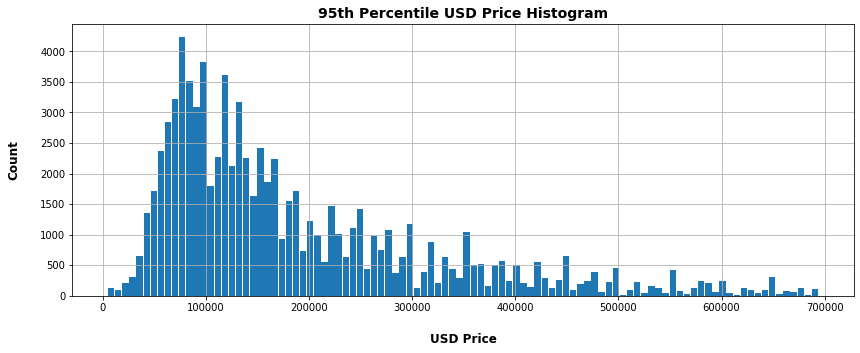

In [293]:
properatti_data_wo_nan_price_p95_price = properatti_data.loc[properatti_data['price_aprox_usd'] 
                                   < properatti_data.price_aprox_usd.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_price.price_aprox_usd.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile USD Price Histogram", weight='bold', size=14)
plt.set_xlabel("USD Price", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Count')

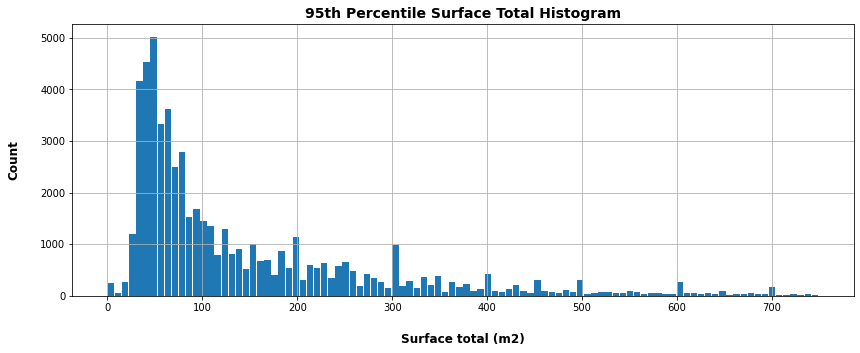

In [294]:
properatti_data_wo_nan_price_p95_surf = properatti_data.loc[properatti_data['surface_total_in_m2'] 
                                   < properatti_data.surface_total_in_m2.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_surf.surface_total_in_m2.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile Surface Total Histogram", weight='bold', size=14)
plt.set_xlabel("Surface total (m2)", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Cantidad de propiedades')

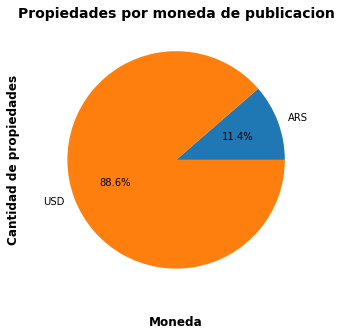

In [295]:
#@title Cantidad de propiedades por moneda de publicacion
propiedades_por_moneda = properatti_data.groupby('currency')['title'].count()

plt = propiedades_por_moneda.plot.pie(y="currency", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades por moneda de publicacion", weight='bold', size=14)
plt.set_xlabel("Moneda", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Cantidad de propiedades", labelpad=20, weight='bold', size=12)

In [296]:
#AA-Armar DataFrame para Graficar el % de Propiedades a la Venta por States

#Reemplazar valores de State_Name para corregir los que tienen simbolor extraños:
properatti_data.state_name = properatti_data.state_name.replace(['Buenos Aires Costa AtlÃ¡ntica', 'Entre RÃ\xados', 'CÃ³rdoba', 'NeuquÃ©n', 'RÃ\xado Negro', 'TucumÃ¡n'],
                      ['Buenos Aires Costa Atlantica', 'Entre Rios', 'Cordoba', 'Neuquen', 'Rio Negro','Tucuman'])


#Validacion de Estates Unicos:
properatti_data.state_name.unique()


#import seaborn as sns

List_State = properatti_data.state_name
counts = List_State.value_counts()
percent = List_State.value_counts(normalize=True)

#DataFrame con Totales y Porcentajes de 2 decimales por cada State
State_Porcentaje= pd.DataFrame({'Totales': counts, "per100": np.round((percent*100),2)})


#Se define una lista con States Unicos
State_distinct = List_State.unique()
States_Unique = State_distinct

#Se define una lista con Porcentaje de cada State
Porcentaje_State = State_Porcentaje.per100


#Se arma un Dataframe con Stados que tengan un Porcentaje Mayor a 1%
Mayor1 = State_Porcentaje['per100'] >=1
Df_SP_Sup1 = pd.DataFrame({'States': State_Porcentaje.loc[Mayor1, :].index, 'Porcentaje': State_Porcentaje.loc[Mayor1, :].per100})
Df_SP_Sup1


#Se arma un Dataframe con Stados que tengan un Porcentaje Menor a 1% y se suman para armar categoria "Otros"
Otros=['Otros']   
Menor1 = State_Porcentaje['per100'] <1
Df_SP_Inf1 = pd.DataFrame({'States': Otros, 'Porcentaje': State_Porcentaje.loc[Menor1, :].per100.sum()})
Df_SP_Inf1


#Concatenar los DataFrame
frames_Sup_Inf= [Df_SP_Sup1, Df_SP_Inf1]
result = pd.concat(frames_Sup_Inf)
Res_plot = result.sort_values('Porcentaje',ascending=False)
Res_plot




,States,Porcentaje
Capital Federal,Capital Federal,27.42
Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Norte,24.75
Bs.As. G.B.A. Zona Sur,Bs.As. G.B.A. Zona Sur,12.75
Buenos Aires Costa Atlántica,Buenos Aires Costa Atlántica,9.74
Córdoba,Córdoba,8.09
Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Oeste,7.57
Santa Fe,Santa Fe,4.68
0,Otros,3.03
Buenos Aires Interior,Buenos Aires Interior,1.97


In [297]:
#AA-Grafico para Porcentaje de Propiedades a la Venta por States
#import plotly.express as px

plotly_df = px.data.gapminder()
fig = px.bar(plotly_df, x=Res_plot.States, y=Res_plot.Porcentaje,
             labels={'States': 'States', 
                     'Porcentajes': '% Porcentajes'}, height=400,  
             title="% de Propiedades a la Venta por States")


fig.show()


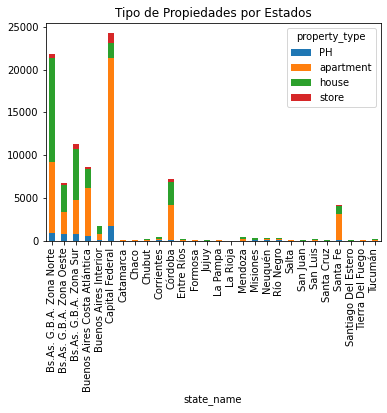

In [298]:
#AA-Cantidad de Tipo de Propiedades por Estados

#Agrupacion de State_Name y Property_Type con sus respevtivos Totales
States_PropType = properatti_data.groupby(['state_name','property_type']).size()

#Se resetea los indices
States_PropType = States_PropType.reset_index()

#Se ordena por Totales
States_PropType2 = States_PropType.sort_values([0], ascending=False)

#Se valida Orden de Totales
States_PropType2

#Grafico
States_PropType2 = pd.pivot_table(States_PropType2, columns = 'property_type', index = 'state_name', 
                                  values = 0)

States_PropType2.plot(kind = 'bar', stacked = True, title='Tipo de Propiedades por Estados')


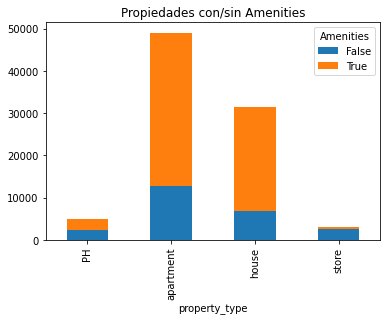

In [299]:
#AA-Catidad de Propiedades con Amenities VS sin Amenities

#Se almacena total de propiedades agrupadas por Amenities y Tipo de Propiedad
Amenities_PropType = df_data_amenities.groupby(['Amenities','property_type']).size()

Amenities_PropType = Amenities_PropType.reset_index()

Amenities_PropType

Amenities_PropType = pd.pivot_table(Amenities_PropType, columns = 'Amenities', index = 'property_type', values = 0)

Amenities_PropType.plot(kind = 'bar', stacked = True, title= 'Propiedades con/sin Amenities')

In [300]:
#AA-Casas con Jardin Y Pileta

#Se filtran solo las Casas
Casa = df_data_amenities[(df_data_amenities['property_type'] == 'house')]

#Del DataFrame de Solo Casas, se evalua cuales tienen Jardin Y Pileta
Casa_JP= ((Casa['Jardin'] == True) & (Casa['Pileta'] == True))

#Se hace reset de los indices
M = pd.DataFrame(Casa_JP.value_counts().reset_index())
#M

#False	38727
#True	1541

#Se cambian los valores True/False y se almacena en DataFrame con los totales
TF= ('No tiene Pileta, ni Jardin','Si Tiene Pileta y Jardin')
M = pd.DataFrame({'Condicion': TF, 'Total': Casa_JP.value_counts()})

M

#Grafico de Casas con Jardin y Pileta

#import plotly.express as px 

CPJ = px.data.iris() 
  
fig = px.pie(M, values='Total', 
             names='Condicion',  title = 'Casas con Jardin y Pileta',
             color_discrete_sequence=px.colors.sequential.Blugrn) 
fig.show()


In [301]:
#AA-Departamentos con Amenities
Depa = df_data_amenities[(df_data_amenities['property_type'] == 'apartment')]

#Con Amenities
Depa_Amenities= (Depa['Amenities'] == True)

Dep_Am = pd.DataFrame(Depa_Amenities.value_counts().reset_index())

#Dep_Am
#True	45410
#False	25655

CA= ('Con Amenities','Sin Amenities')
G_DA = pd.DataFrame({'Condicion': CA, 'Total': Depa_Amenities.value_counts()})

G_DA

,Condicion,Total
True,Con Amenities,36358
False,Sin Amenities,12676


In [302]:
import plotly.express as px 
#Grafico con Departamentos con Amenities Vs sin Amenities

CPJ = px.data.iris() 
  
fig = px.pie(G_DA, values='Total', 
             names='Condicion',  title = 'Departamentos con Ameties',
             color_discrete_sequence=px.colors.sequential.Aggrnyl) 
fig.show()

In [303]:
#AA-Comparativa de Promedio del precio de los Departamentos con Amenities vs sin Amenities
#Origen el Dataframe de Solo Departamento hecha anteriormente

#Se identifican los montos de price_aprox_usd nulos para no tomarlos en cuenta en el analisis
Montos_No_Nulos = Depa.price_aprox_usd.isnull() == False

Depa_Precio = pd.DataFrame(Depa[Montos_No_Nulos])

Depa_Precio

#Se calcula promedio de price_aprox_usd segun si tiene o no Amenities
Depa_Precio.groupby('Amenities')['price_aprox_usd'].mean()

#Se arma mask con Amenities y los precios
data_precio_usd = pd.DataFrame({'Amenities' : (Depa_Precio['Amenities']),'Precios': (Depa_Precio['price_aprox_usd'])})

Amenities_TF= ('Con Amenities','Sin Amenities')

#Se arma DataFrame con resultado de Condicion de Amenities y Precio Promedio con 2 decimales, ordenado descendiente.
Prom_Amenities_Depa = pd.DataFrame({'Condicion': Amenities_TF, 
                                    'Precio_Promedio_USD': data_precio_usd.groupby('Amenities')['Precios'].mean().round(2).sort_values(ascending=False)})


Prom_Amenities_Depa


,Condicion,Precio_Promedio_USD
Amenities,,
True,Con Amenities,205007.54
False,Sin Amenities,130519.99


In [304]:
#import plotly.express as px

#Grafico de Precio Promedio USD de Depa Con vs Sin Amenities

Plotly_Prom_Amenities_Depa = px.data.gapminder()
fig = px.bar(Plotly_Prom_Amenities_Depa, x=Prom_Amenities_Depa.Condicion, y=Prom_Amenities_Depa.Precio_Promedio_USD,
             labels={'Condicion':'Tiene vs No tiene Amenities', 'Precio_Promedio_USD':'Precio Promedio USD'}, #No funcionan los Labels
             height=450, width = 600, 
             color_discrete_sequence=px.colors.qualitative.Bold,
             title="Precio Promedio USD de Depa Con vs Sin Amenities")

fig.show()

In [305]:
#AA-Solo tomamos los valores menores a 1.000.000 
dpp = df_data_amenities[(df_data_amenities['price_aprox_usd']<1000000)]
#dpp

prom = dpp.groupby('state_name')['price_aprox_usd'].mean().round(2) #(normalize=True)
#prom

#DataFrame con Precio Promedio USD de 2 decimales por cada State
State_Prom_usd = pd.DataFrame({'State': prom.index, "Prom_usd": prom})

State_Prom_usd

,State,Prom_usd
state_name,,
Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Norte,277243.41
Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Oeste,157102.71
Bs.As. G.B.A. Zona Sur,Bs.As. G.B.A. Zona Sur,187772.77
Buenos Aires Costa Atlántica,Buenos Aires Costa Atlántica,138761.13
Buenos Aires Interior,Buenos Aires Interior,170773.44
Capital Federal,Capital Federal,228276.41
Catamarca,Catamarca,306008.43
Chaco,Chaco,178583.55
Chubut,Chubut,230593.88


In [306]:

plotly_df_prom_usd = px.data.gapminder()
fig = px.bar(plotly_df_prom_usd, x=State_Prom_usd.State, y=State_Prom_usd.Prom_usd,
             labels={'State': 'States', 
                     'Prom_usd': 'Precio Promedio USD'}, height=400,  
             title="Precio Promedio de Propiedades a la Venta por States")
#State_Prom_usd = pd.DataFrame({'State': prom.index, "Prom_usd": prom})

fig.show()

In [307]:
geometria = gpd.points_from_xy(properatti_data.lon, properatti_data.lat)




In [308]:
geo_arg = gpd.GeoDataFrame(properatti_data, geometry=geometria)
geo_arg.head(5)

,operation,property_type,place_name,country_name,lat,lon,price,currency,state_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,Escalera,Baulera,Iluminacion,Jardin,Ascensor,Pileta,Cochera,Parrilla,Laundry,SUM,Balcon,Amenities,geometry
0,sell,PH,Mataderos,Argentina,-34.661824,-58.508839,62000.0,USD,Capital Federal,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-58.50884 -34.66182)
1,sell,apartment,La Plata,Argentina,-34.903883,-57.964330,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,False,False,False,False,False,False,True,False,False,False,True,True,POINT (-57.96433 -34.90388)
2,sell,apartment,Mataderos,Argentina,-34.652262,-58.522982,72000.0,USD,Capital Federal,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-58.52298 -34.65226)
3,sell,PH,Liniers,Argentina,-34.647797,-58.516424,95000.0,USD,Capital Federal,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-58.51642 -34.64780)
4,sell,apartment,Centro,Argentina,-38.002626,-57.549447,64000.0,USD,Buenos Aires Costa Atlántica,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,False,False,True,False,False,False,False,False,False,False,False,False,POINT (-57.54945 -38.00263)


In [312]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]

AttributeError: ignored

In [318]:
fig, ax = plt.subplot()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mapa de Argentina
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
fig = geo_arg.plot(ax=ax, color='red')

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)


AttributeError: ignored